In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/spotify-tracks-audio-features.csv")
print(df.shape)


(18750, 14)


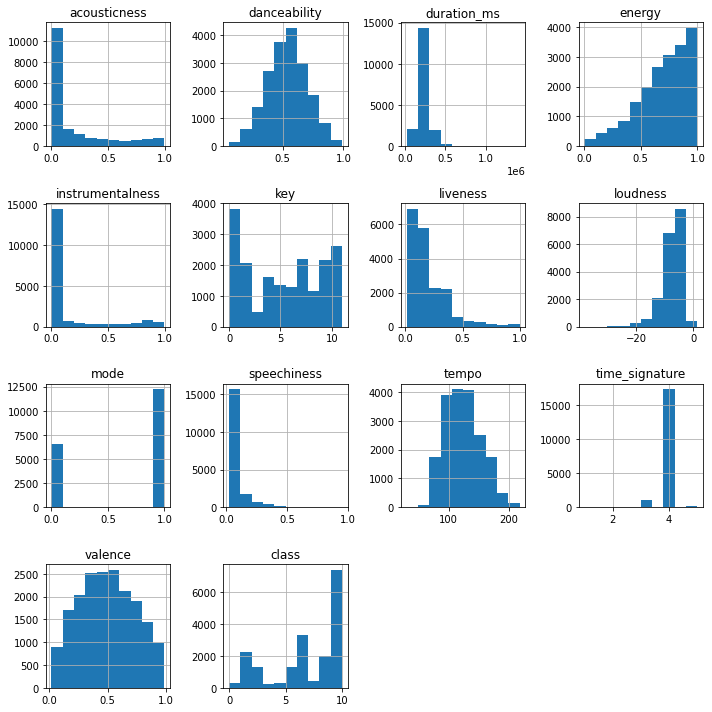

In [2]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10))
plt.tight_layout()


<AxesSubplot:>

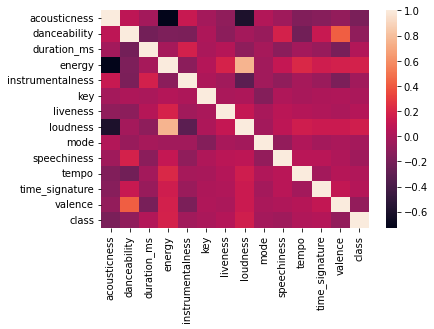

In [3]:
import seaborn as sns

df_corr = df.corr()
sns.heatmap(df_corr)


In [4]:
import numpy as np

dataset = df.values
m, n = dataset.shape
x, y = dataset[:, : n - 1], dataset[:, n - 1]

column_mins = []
column_maxs = []

for i in range(n - 1):
    column_mins.append(min(x[:, i]))
    column_maxs.append(max(x[:, i]))

x_norm = np.zeros((m, n - 1))

for i in range(m):
    for j in range(n - 1):
        xi = x[i, j]
        x_norm[i, j] = (xi - column_mins[j]) / (column_maxs[j] - column_mins[j])

x = x_norm.copy()

classes = []

for yi in y:
    if yi not in classes:
        classes.append(yi)

classes.sort()
classes_len = len(classes)
y_one_hot = np.zeros((m, classes_len))

for i in range(m):
    yi = int(y[i])
    y_one_hot[i, yi] = 1

y = y_one_hot


In [5]:
from sklearn.model_selection import train_test_split

train_percentage = 90
test_size = 1 - (train_percentage / 100)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=42
)


In [6]:
features_n = len(x_train[0, :])
classes_n = len(classes)

In [7]:
from keras.models import Sequential
from keras.layers import Dense


def build_model(input_dim: int, output_dim: int):
    model = Sequential()
    model.add(Dense(input_dim, input_dim=input_dim))
    model.add(Dense(20, activation="sigmoid"))
    model.add(Dense(34, activation="sigmoid"))
    model.add(Dense(20, activation="sigmoid"))
    model.add(Dense(output_dim, activation="sigmoid"))
    # model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


In [8]:
from keras.callbacks import History

model = build_model(features_n, classes_n)
history: History = model.fit(x_train, y_train, epochs=100)


Epoch 1/100
528/528 [==============================] - 5s 2ms/step - loss: 0.3080 - accuracy: 0.2600
Epoch 2/100
528/528 [==============================] - 1s 2ms/step - loss: 0.2681 - accuracy: 0.2871
Epoch 3/100
528/528 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.2871
Epoch 4/100
528/528 [==============================] - 1s 1ms/step - loss: 0.2584 - accuracy: 0.2872
Epoch 5/100
528/528 [==============================] - 1s 2ms/step - loss: 0.2518 - accuracy: 0.2911
Epoch 6/100
528/528 [==============================] - 1s 2ms/step - loss: 0.2478 - accuracy: 0.2945
Epoch 7/100
528/528 [==============================] - 1s 2ms/step - loss: 0.2446 - accuracy: 0.3015
Epoch 8/100
528/528 [==============================] - 1s 2ms/step - loss: 0.2409 - accuracy: 0.3308
Epoch 9/100
528/528 [==============================] - 1s 2ms/step - loss: 0.2357 - accuracy: 0.3678
Epoch 10/100
528/528 [==============================] - 1s 2ms/step - loss: 0.2323 - accura

In [9]:
model.evaluate(x_test, y_test)


59/59 [==============================] - 1s 1ms/step - loss: 0.2235 - accuracy: 0.4096


[0.2235470712184906, 0.40959998965263367]

(0.0, 1.0)

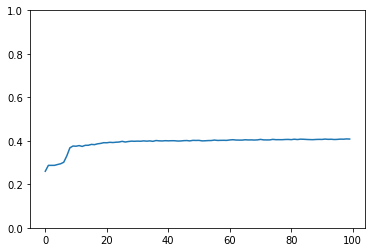

In [10]:
x = history.history["accuracy"]
y = np.arange(len(x))

plt.plot(y, x)
plt.ylim([0, 1])


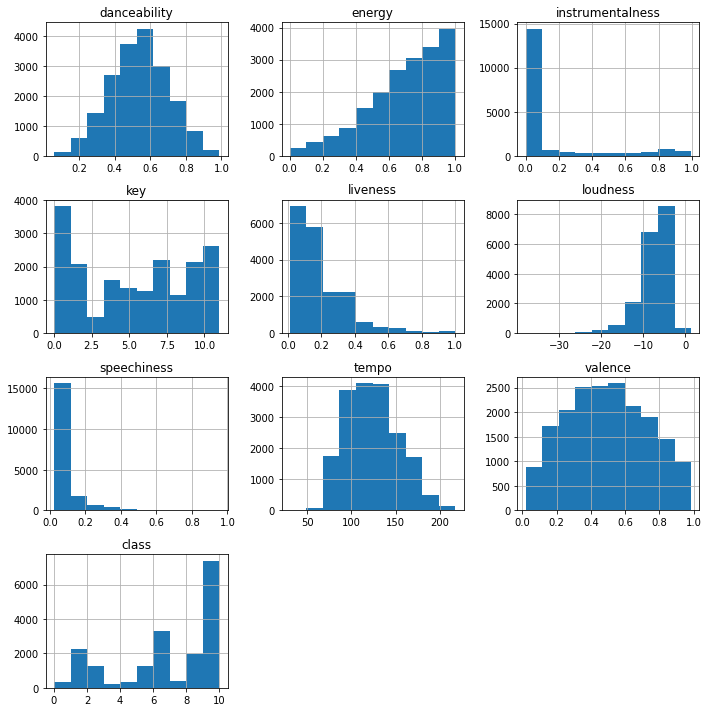

In [11]:
df = df.drop(columns=["time_signature", "mode", "duration_ms", "acousticness"])

df.hist(figsize=(10, 10))
plt.tight_layout()


<AxesSubplot:>

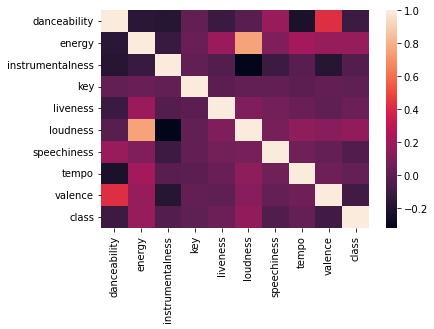

In [12]:
import seaborn as sns

df_corr = df.corr()
sns.heatmap(df_corr)


In [13]:
import numpy as np

dataset = df.values
m, n = dataset.shape
x, y = dataset[:, : n - 1], dataset[:, n - 1]

column_mins = []
column_maxs = []

for i in range(n - 1):
    column_mins.append(min(x[:, i]))
    column_maxs.append(max(x[:, i]))

x_norm = np.zeros((m, n - 1))

for i in range(m):
    for j in range(n - 1):
        xi = x[i, j]
        x_norm[i, j] = (xi - column_mins[j]) / (column_maxs[j] - column_mins[j])

x = x_norm.copy()

In [14]:
from sklearn.model_selection import train_test_split

train_percentage = 90
test_size = 1 - (train_percentage / 100)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=42
)

features_n = len(x_train[0, :])
classes_n = 1

In [15]:
from keras.models import Sequential
from keras.layers import Dense


def build_model(input_dim: int, output_dim: int):
    model = Sequential()
    model.add(Dense(input_dim, input_dim=input_dim))
    model.add(Dense(20, activation="relu"))
    model.add(Dense(34, activation="relu"))
    model.add(Dense(20, activation="relu"))
    model.add(Dense(output_dim, activation="relu"))
    # model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [16]:
from keras.callbacks import History

model = build_model(features_n, classes_n)
history: History = model.fit(x_train, y_train, epochs=100)


Epoch 1/100
528/528 [==============================] - 2s 2ms/step - loss: -75.5358 - accuracy: 0.1112
Epoch 2/100
528/528 [==============================] - 1s 2ms/step - loss: -85.3163 - accuracy: 0.1199
Epoch 3/100
528/528 [==============================] - 1s 1ms/step - loss: -85.3227 - accuracy: 0.1199
Epoch 4/100
528/528 [==============================] - 1s 1ms/step - loss: -85.3227 - accuracy: 0.1199
Epoch 5/100
528/528 [==============================] - 1s 2ms/step - loss: -85.3227 - accuracy: 0.1199
Epoch 6/100
528/528 [==============================] - 1s 1ms/step - loss: -85.3227 - accuracy: 0.1199
Epoch 7/100
528/528 [==============================] - 1s 1ms/step - loss: -85.3227 - accuracy: 0.1199
Epoch 8/100
528/528 [==============================] - 1s 1ms/step - loss: -85.3227 - accuracy: 0.1199
Epoch 9/100
528/528 [==============================] - 1s 1ms/step - loss: -85.3227 - accuracy: 0.1199
Epoch 10/100
528/528 [==============================] - 1s 1ms/step - los

In [17]:
model.evaluate(x_test, y_test)


59/59 [==============================] - 0s 1ms/step - loss: -84.7288 - accuracy: 0.1120


[-84.72884368896484, 0.1120000034570694]

In [47]:
import numpy as np

dataset = df.values
m, n = dataset.shape
x, y = dataset[:, : n - 1], dataset[:, n - 1]

column_mins = []
column_maxs = []

for i in range(n - 1):
    column_mins.append(min(x[:, i]))
    column_maxs.append(max(x[:, i]))

x_norm = np.zeros((m, n - 1))

for i in range(m):
    for j in range(n - 1):
        xi = x[i, j]
        x_norm[i, j] = (xi - column_mins[j]) / (column_maxs[j] - column_mins[j])

x = x_norm.copy()

classes = []

for yi in y:
    if yi not in classes:
        classes.append(yi)

classes.sort()
classes_len = len(classes)
y_one_hot = np.zeros((m, classes_len))

for i in range(m):
    yi = int(y[i])
    y_one_hot[i, yi] = 1

y = y_one_hot


In [48]:
from sklearn.model_selection import train_test_split

train_percentage = 80
test_size = 1 - (train_percentage / 100)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=42
)

features_n = len(x_train[0, :])
classes_n = len(classes)

In [49]:
from keras.models import Sequential
from keras.layers import Dense


def build_model(input_dim: int, output_dim: int):
    model = Sequential()
    model.add(Dense(input_dim, input_dim=input_dim))
    model.add(Dense(20, activation="sigmoid"))
    model.add(Dense(34, activation="sigmoid"))
    model.add(Dense(20, activation="sigmoid"))
    model.add(Dense(output_dim, activation="sigmoid"))
    # model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [50]:
model = build_model(features_n, classes_n)
history_one_hot: History = model.fit(x_train, y_train, epochs=100)


Epoch 1/100
469/469 [==============================] - 6s 3ms/step - loss: 0.3205 - accuracy: 0.2581
Epoch 2/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2683 - accuracy: 0.2873
Epoch 3/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2681 - accuracy: 0.2873
Epoch 4/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2662 - accuracy: 0.2874
Epoch 5/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2560 - accuracy: 0.3085
Epoch 6/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2501 - accuracy: 0.3287
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2471 - accuracy: 0.3318
Epoch 8/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2451 - accuracy: 0.3322
Epoch 9/100
469/469 [==============================] - 1s 1ms/step - loss: 0.2432 - accuracy: 0.3384
Epoch 10/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2417 - accura

In [51]:
evaluation = model.evaluate(x_test, y_test)
accuracy = evaluation[1]

print(f"{accuracy*100:.2f}% accuracy")


118/118 [==============================] - 1s 1ms/step - loss: 0.2239 - accuracy: 0.4067
40.67% accuracy


In [52]:
import matplotlib.pyplot as plt
import numpy as np

predictions: np.ndarray = model.predict(x_test)


118/118 [==============================] - 0s 1ms/step


3750 3750


Text(0.5, 1.0, 'Class prediction')

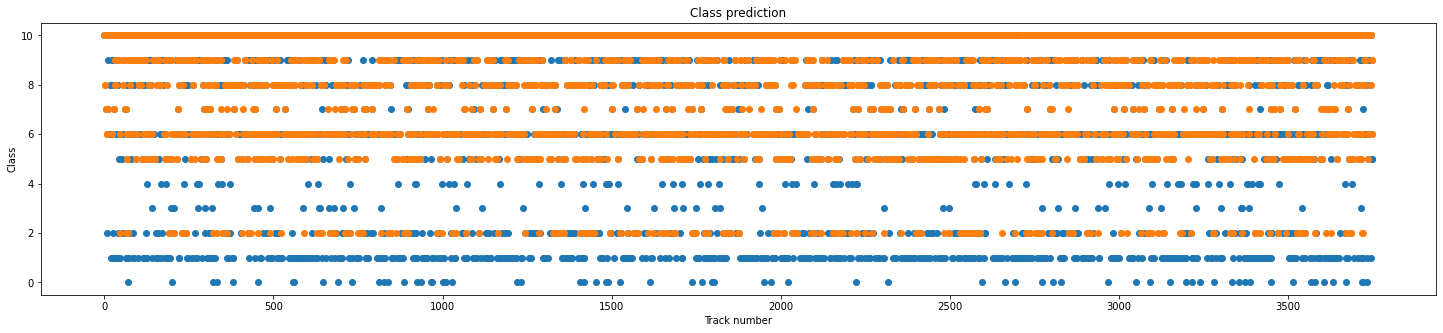

In [53]:
y_pred = []

print(len(predictions), len(y_test))

for yi in predictions:
    yi_list = list(yi)
    class_p = max(yi_list)
    y_pred.append(yi_list.index(class_p))

y_n_test = []

for yi in y_test:
    yi_list = list(yi)
    class_p = max(yi_list)
    y_n_test.append(yi_list.index(class_p))

x = np.arange(len(y_pred))

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y_n_test)
ax.scatter(x, y_pred)
ax.set_xlabel("Track number")
ax.set_ylabel("Class")
plt.title("Class prediction")

In [74]:
import plotly.graph_objects as go

df_dict = {
    "Classes": [],
    "Tracks": [],
    "Set Type": [],
}
    
for yi in y_n_test:
    df_dict["Classes"].append(yi)
    df_dict["Set Type"].append("Test Set")

for yi in y_pred:
    df_dict["Classes"].append(yi)
    df_dict["Set Type"].append("Prediction Deep Neural Network")

df_dict["Tracks"] += list(np.arange(len(y_test)))
df_dict["Tracks"] += list(np.arange(len(y_pred)))

df_test = pd.DataFrame(df_dict)
df_test

,Classes,Tracks,Set Type
0,10,0,Test Set
1,10,1,Test Set
2,10,2,Test Set
3,10,3,Test Set
4,7,4,Test Set
...,...,...,...
7495,10,3745,Prediction Deep Neural Network
7496,10,3746,Prediction Deep Neural Network
7497,6,3747,Prediction Deep Neural Network
7498,9,3748,Prediction Deep Neural Network


In [79]:
import plotly.express as px

fig = px.scatter(df_test, y="Classes", x="Tracks", color="Set Type", title="Deep Neural Network Results Comparison")
fig.update_traces(marker_size=5)
fig.show()

In [76]:
from pathlib import Path

filepath = Path("../data/outs/neural-out.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)
df_test.to_csv(filepath, index=False)

(0.1, 0.5)

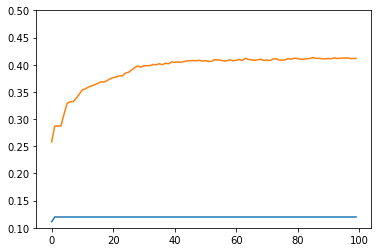

In [77]:
x1 = history.history["accuracy"]
y = np.arange(len(x1))

x2 = history_one_hot.history["accuracy"]

plt.plot(y, x1)
plt.plot(y, x2)
plt.ylim([.1, .5])


In [78]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y,
    y=x1,
    name="Normal class"
))
fig.add_trace(go.Scatter(
    x=y,
    y=x2,
    name="One hot encoded class"
))
fig.update_layout(
    title="Model accuracy progress",
    xaxis_title="Epocs",
    yaxis_title="Range",
    legend_title="Legend Title",
)
fig.show()